# CRAI service demo on smart duck

Using the Duck service:
https://github.com/climateintelligence/duck

Infilling with trained AI model for climate data (HadCRUT) done with CRAI:
https://github.com/FREVA-CLINT/climatereconstructionAI/tree/clint

Model is trained for HadCRUT data:
* https://www.metoffice.gov.uk/hadobs/hadcrut5/
* https://www.metoffice.gov.uk/hadobs/hadcrut4/index.html

Running on smartduck VM:
smartduck.cloud.dkrz.de

You can also use the Phoenix WebApp:
https://clint.dkrz.de/


## Using the birdy client to access the duck service
https://github.com/bird-house/birdy

In [1]:
from birdy import WPSClient

url = "https://smartduck.dkrz.de/wps"

wps = WPSClient(url, verify=False)

In [2]:
# show available processes
help(wps)

Help on WPSClient in module birdy.client.base:

<birdy.client.base.WPSClient object>
    A Demo Web Service for CRAI.

    Processes
    ---------

    crai
        AI-enhanced climate service to infill missing values in climate datasets.



In [3]:
# show details of crai infilling process
help(wps.crai)

Help on method crai in module birdy.client.base:

crai(file=None, dataset_name='HadCRUT5', variable_name='tas_mean') method of birdy.client.base.WPSClient instance
    AI-enhanced climate service to infill missing values in climate datasets.

    Parameters
    ----------
    dataset_name : {'HadCRUT5', 'HadCRUT4'}string
        Choose the type of dataset to be infilled.
    file : ComplexData:mimetype:`application/x-netcdf`, :mimetype:`application/zip`
        Enter a URL pointing to a NetCDF file with missing values.
    variable_name : string
        Enter here the variable name to be infilled.

    Returns
    -------
    output : ComplexData:mimetype:`application/x-netcdf`
        NetCDF output produced by CRAI.
    plot : ComplexData:mimetype:`image/png`
        Preview of the first time step



## Run HadCRUT5 infilling

In [4]:
HadCRUT5 = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/non-infilled/HadCRUT.5.0.2.0.anomalies.ensemble_mean.nc"

resp = wps.crai(
    file=HadCRUT5, 
    dataset_name="HadCRUT5",
    variable_name="tas_mean"
)
resp.status

'ProcessSucceeded'

In [5]:
# show all outputs
resp.get()


craiResponse(
    output='https://smartduck.dkrz.de:443/outputs/duck/d00b18b2-2a34-11ef-8d46-fa163ed8abae/HadCRUT.5.0.2.0.anomalies.ensemble_mean_infilled.nc',
    plot='https://smartduck.dkrz.de:443/outputs/duck/d00b18b2-2a34-11ef-8d46-fa163ed8abae/HadCRUT.5.0.2.0.anomalies.ensemble_mean_combined.1_0.png'
)

In [6]:
# show plot
resp.get()[1]

'https://smartduck.dkrz.de:443/outputs/duck/d00b18b2-2a34-11ef-8d46-fa163ed8abae/HadCRUT.5.0.2.0.anomalies.ensemble_mean_combined.1_0.png'

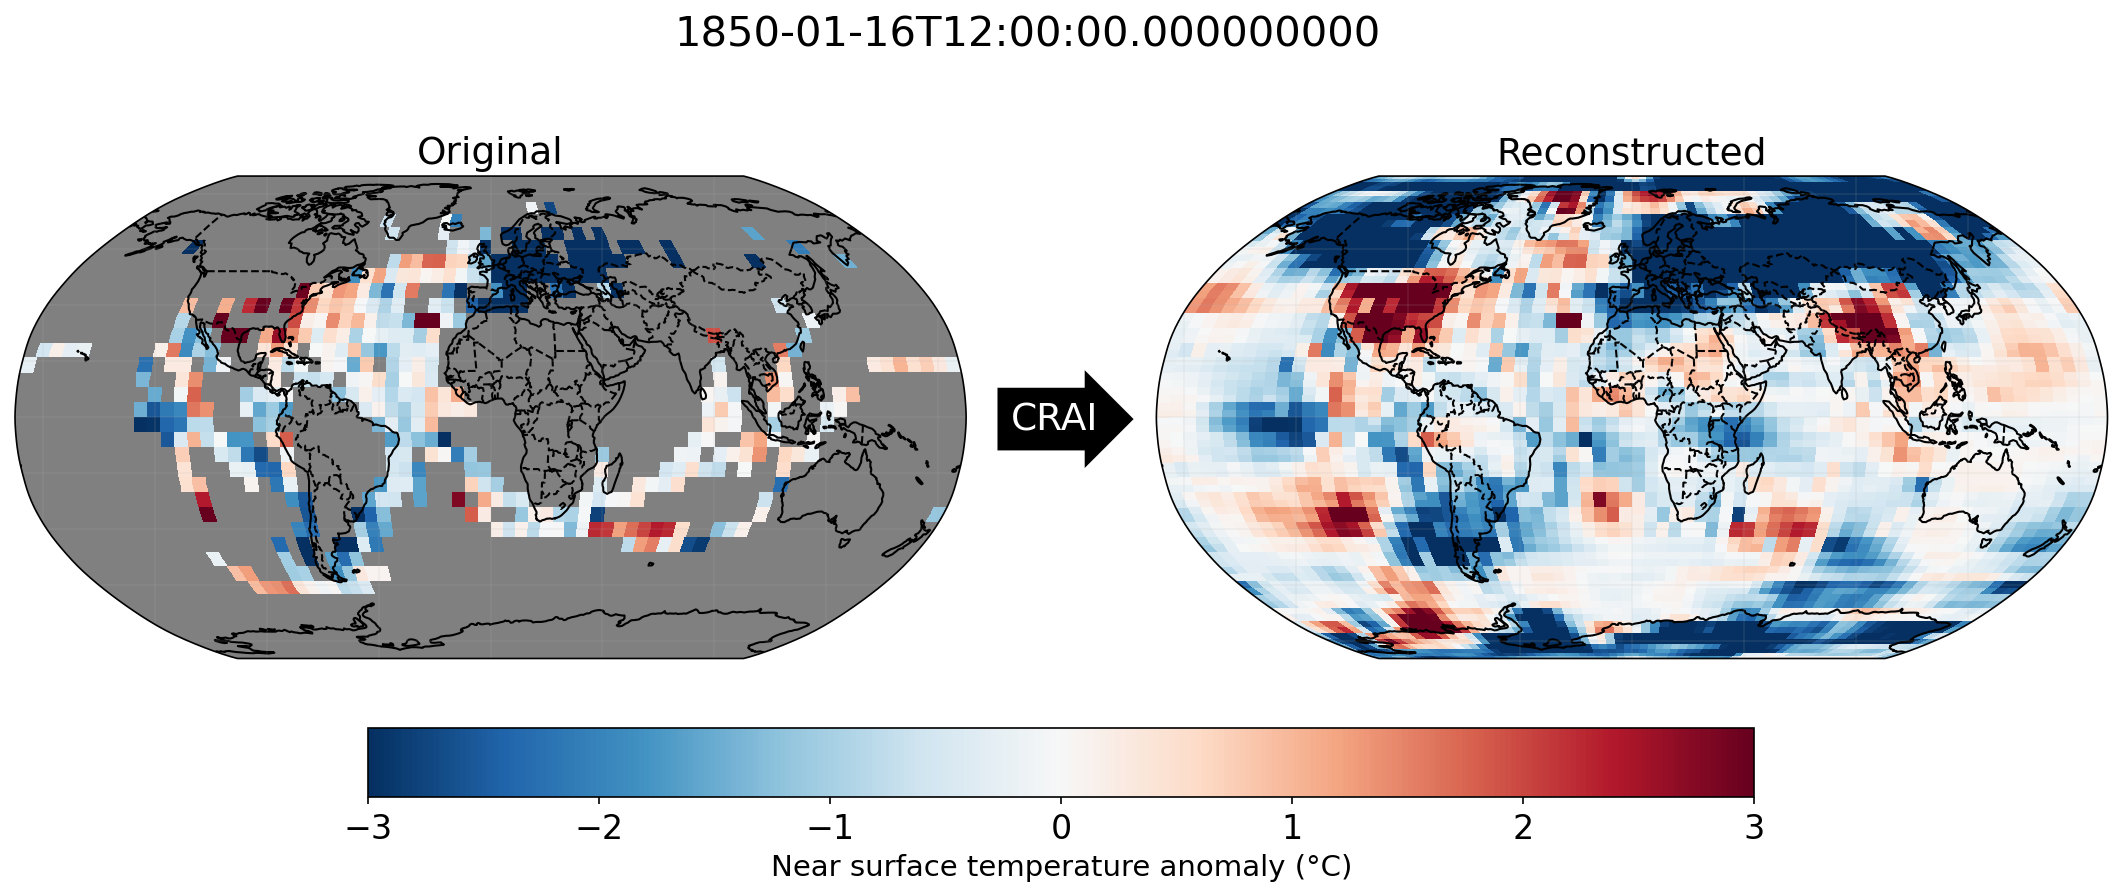

In [7]:
# display plot

from IPython.display import Image
import requests

data = requests.get(resp.get()[1], verify=False).content

Image(data)

## Run HadCRUT4 infilling

In [8]:
HadCRUT4 = "https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/gridded_fields/HadCRUT.4.6.0.0.median_netcdf.zip"

resp = wps.crai(
    file=HadCRUT4, 
    dataset_name="HadCRUT4",
    variable_name="temperature_anomaly"
)
resp.status

'ProcessSucceeded'

In [9]:
# show all outputs
resp.get()

craiResponse(
    output='https://smartduck.dkrz.de:443/outputs/duck/d6a56236-2a34-11ef-a1ba-fa163ed8abae/HadCRUT.4.6.0.0.median_netcdf_infilled.zip',
    plot='https://smartduck.dkrz.de:443/outputs/duck/d6a56236-2a34-11ef-a1ba-fa163ed8abae/HadCRUT.4.6.0.0.median_combined.1_0.png'
)

In [10]:
# show plot url
resp.get()[1]

'https://smartduck.dkrz.de:443/outputs/duck/d6a56236-2a34-11ef-a1ba-fa163ed8abae/HadCRUT.4.6.0.0.median_combined.1_0.png'

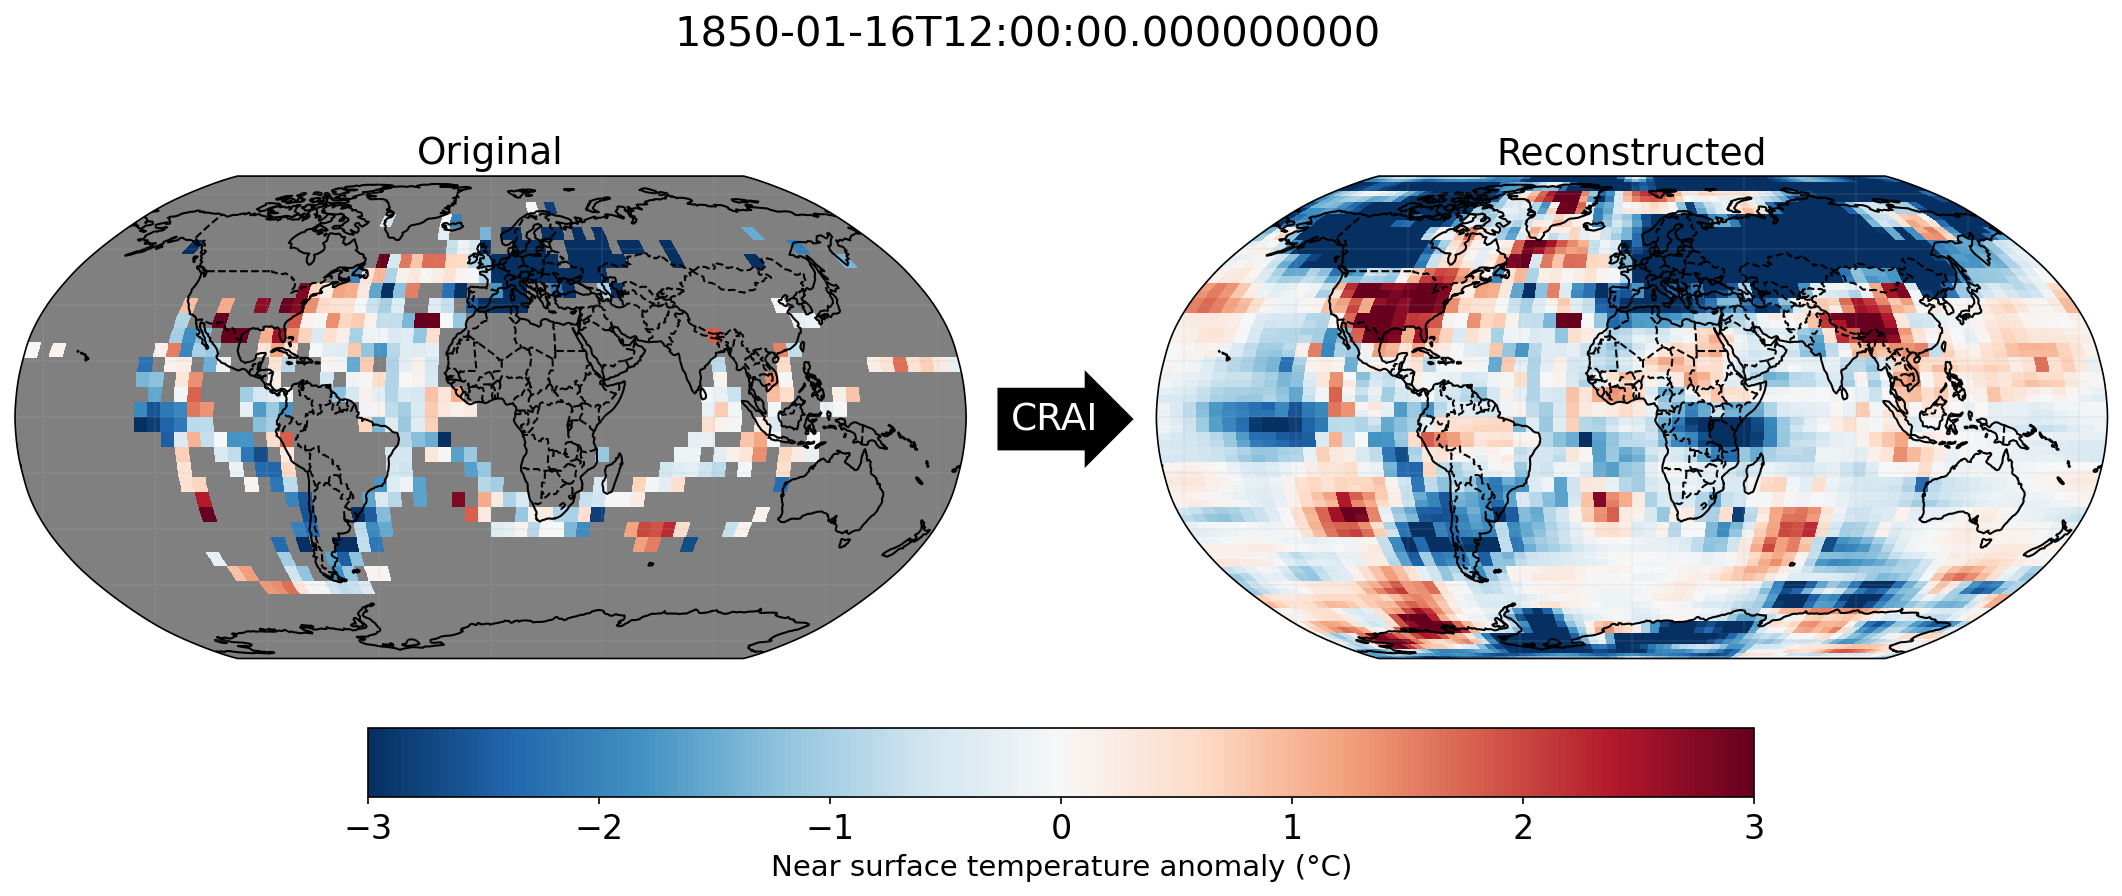

In [11]:
# display plot

from IPython.display import Image
import requests

data = requests.get(resp.get()[1], verify=False).content

Image(data)